##**Week 1 (Statistical Forecasting)**##
* Data used is just dummy data created bu us

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps (x - axis)
      series (array of int) - contains the measurements for each time step (y-axis)
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple: # only when two series are passed to this

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [53]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope (similar to y = wx + b) but here b = 0
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    # This are the patterns to be repeated
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

**Test Trend function generation**

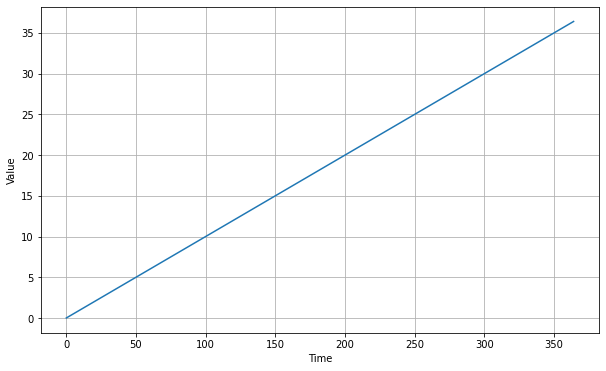

In [54]:
# Gen data with upward trend since slope is +ve. for downward trend use -ve slope
time = np.arange(365)

slope = 0.1

series = trend(time, slope)

plot_series(time, series)

**Test Seasonality**

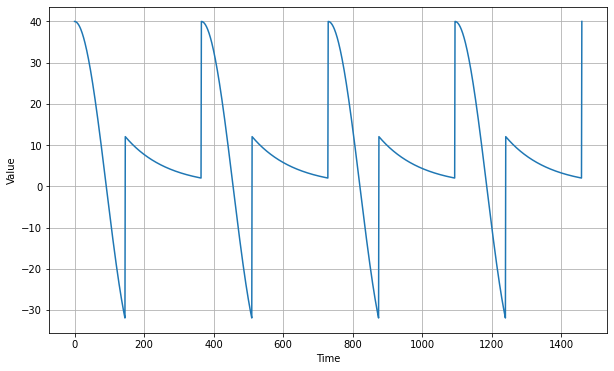

In [55]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365      # time repeate pattern which is every 365 data points
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

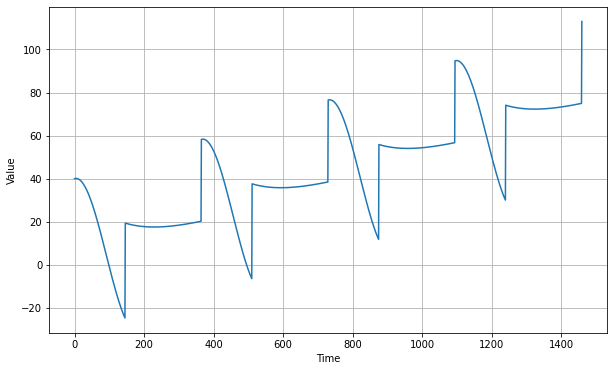

In [56]:
# seasonal pattern with upward trend, since slope is +ve
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

**Test Noise**

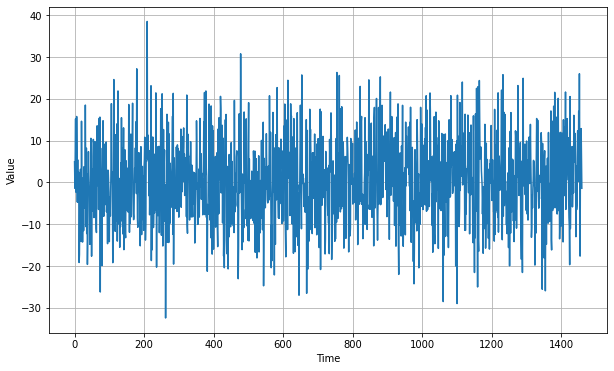

In [57]:
noise_level = 10  # higher value means more noise and 0 is no noise

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

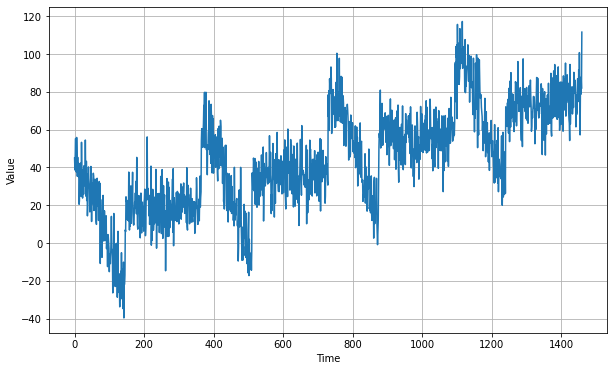

In [58]:
# adds noise to the seasonal upward trend data
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

**Autocorrelation**
* auto correlation means: function of a time step "t" will be a function of a previous time step "t-n" e.g V(t) = 0.99 * V(t-1) meaning 99% of previous time step

In [59]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    # this first 50 elements will be discarded once done autocorrelating last len(time) - 50 elements
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-33), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar



# much more straight forward
# auto correlating t with t-1
def autocorrelation_simple(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

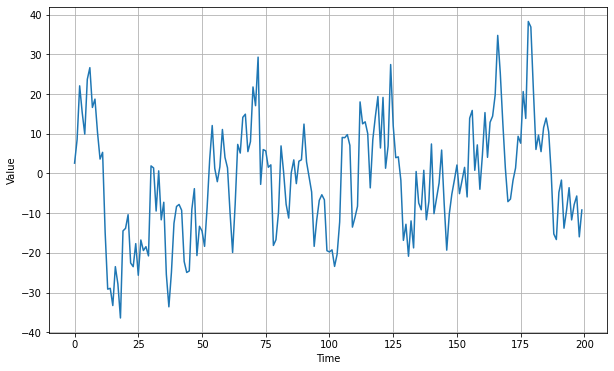

In [60]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation_simple(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

**Autocorrelation with impulses**
* e.g one where it decays predictably after random spikes

In [61]:
# first define the impulse formular

def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps (x)
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses) # idx in time where we want the impulses

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
      series[index] += rnd.rand() * amplitude

    return series    

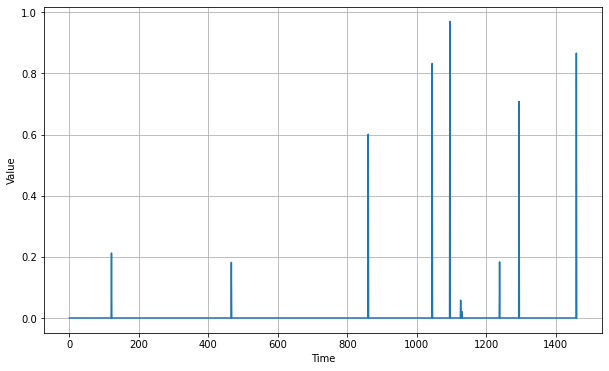

In [62]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [63]:
# here we decay next value after a spike
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

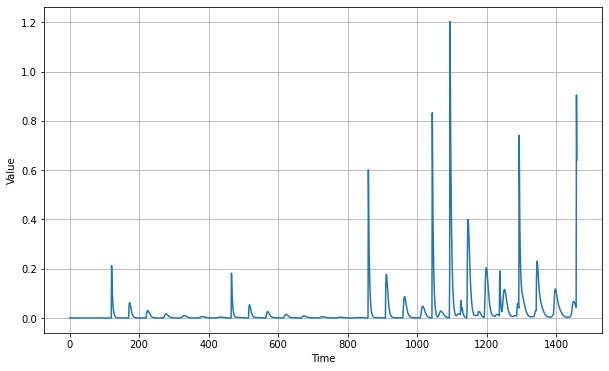

In [64]:
# Use the impulses from the previous section and generate autocorrelated data

# series = autocorrelation_impulses(impulses_signal, {1: 0.99})
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})


# Plot the results
plot_series(time, series)

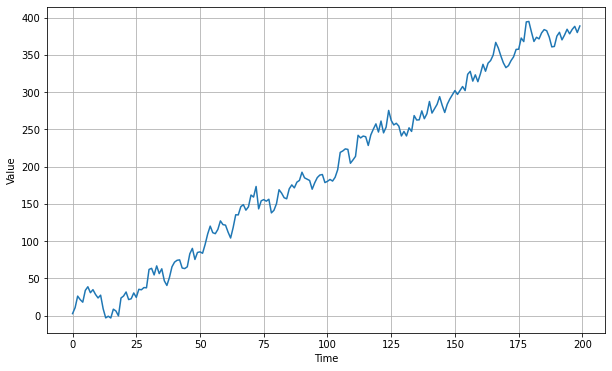

In [65]:
# Generate autocorrelated data with an upward trend
series = autocorrelation_simple(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

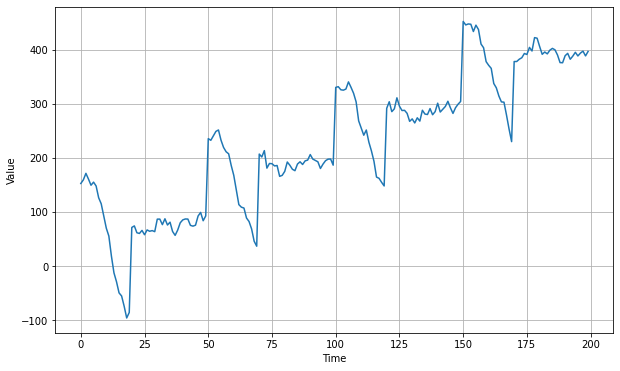

In [66]:
# Generate autocorrelated data with an upward trend and seasonality
series = autocorrelation_simple(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])


**Non-Stationary Time Series**
* occuring from data breaking a pattern or trend, which is quite normal in the insane world of trading

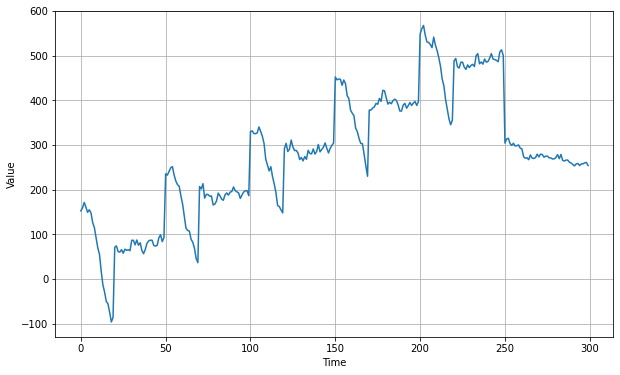

In [67]:
# Generate data with positive trend
series = autocorrelation_simple(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation_simple(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 250
series[250:] = series2[250:]

# Plot the result
plot_series(time[:300], series[:300])

**Generate our Synthetic data for Statistical forecasting**

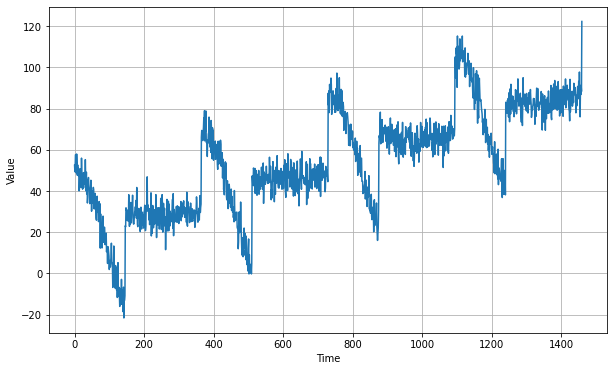

In [68]:
# Generate the Synthetic data . This will start at a baseline then trend upwards with a seasonal pattern every 365 steps along with noise 
# added to chart

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [69]:
# splits data into train and val with test being unseen data

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]  # will be on x-axis of plot
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]  # will be on x-axis of plot
x_valid = series[split_time:]

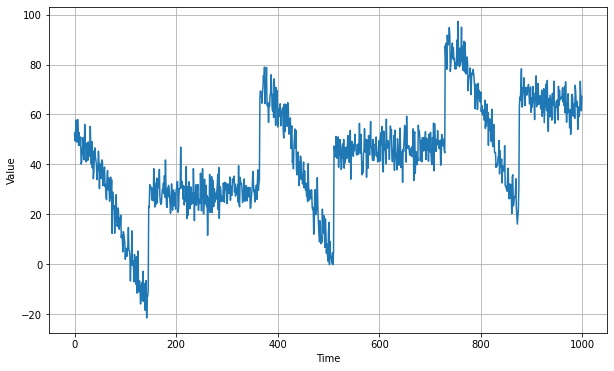

In [70]:
# plot train set
plot_series(time_train, x_train)

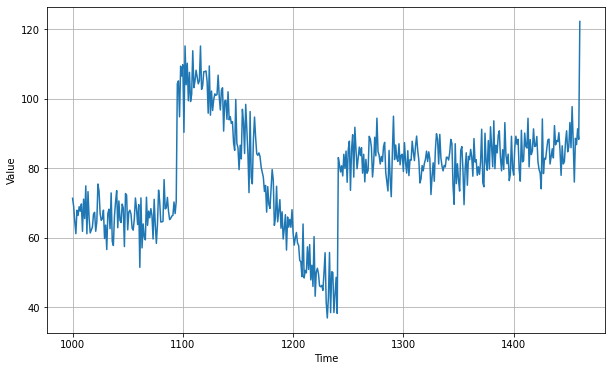

In [71]:
# Plot the validation set
plot_series(time_valid, x_valid)

 **Naive Forecasting**
 * As a baseline, you can do a naive forecast where you assume that the next value will be the same as the previous time step. You can slice the original series like below and print some values as a sanity check. The next time step value should be identical to the ground truth at the previous time step.

In [72]:
# Generate the naive forecast, excluding the last time step of whole series and starts from splittime -1
# meaning forecast lags 1 behind time-series
naive_forecast = series[split_time - 1:-1] 

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


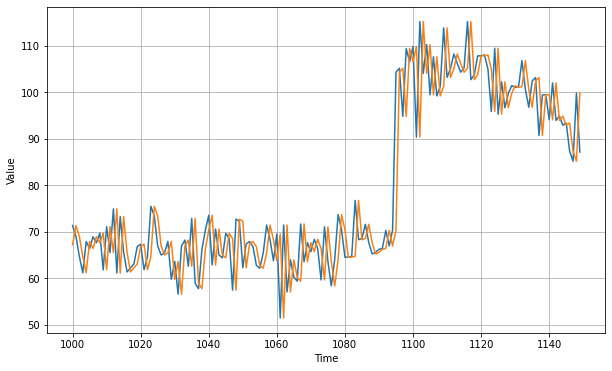

In [73]:
# Plot the results of forecast in orange
# plot_series(time_valid, (x_valid, naive_forecast))

# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [74]:
# helper to compute metrics
def compute_metrics(actual, forecasted):
  print(tf.keras.metrics.mean_squared_error(actual, forecasted).numpy())
  print(tf.keras.metrics.mean_absolute_error(actual, forecasted).numpy())


compute_metrics(x_valid, naive_forecast)

61.827534
5.937908


**Using Moving Average to forecast**

* This sums up a series of time steps and the average will be the prediction for the next time step. For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on. 
The function below does the moving average for the entire `series`. It takes a `window_size` argument to indicate the number of time steps to consider when computing the mean.

In [75]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []
    
    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
   
   
    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

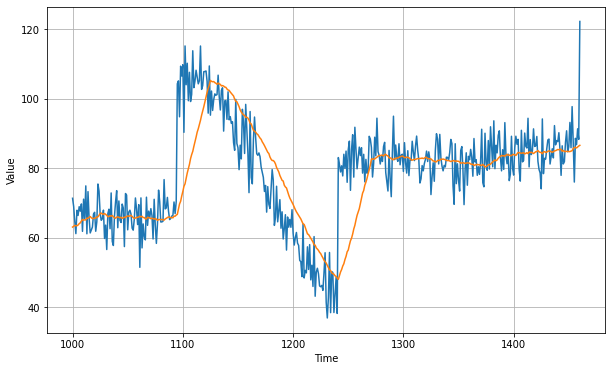

In [76]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:] # sice moving avg is less than series by 30 take "split_time - 30:" of result

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [77]:
# even worse than naive forecasting due to presence of trend and seasonality
compute_metrics(x_valid, moving_avg)

106.674576
7.142419


**Using Differencing to correct fault of just direct moving avg**

* Since the seasonality period is 365 days, you will subtract the value at time *t* – 365 from the value at time *t*. That is done with the code below. In addition, you will need to align the result with the `time` array. Since you can only do time differencing for `t >= 365`, you will need to truncate the first 365 time steps of the `time` array.
You can plot the result to visualize the values.

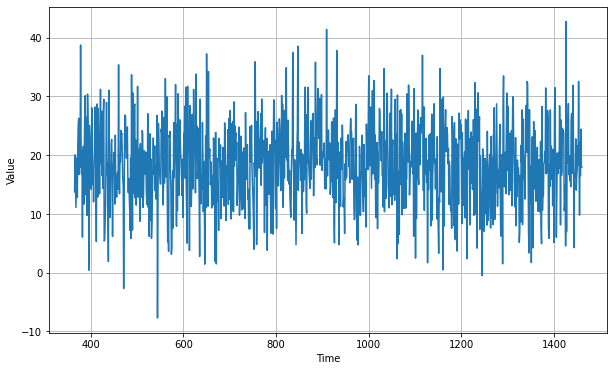

In [80]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

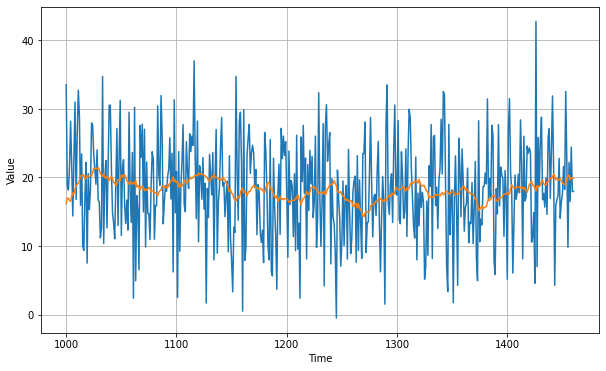

In [114]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

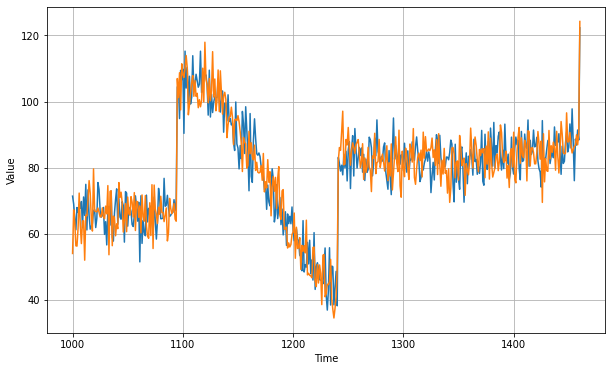

In [115]:
# bring bring back the trend and seasonality by adding the past values from t – 365

# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [116]:
compute_metrics(x_valid, diff_moving_avg_plus_past)

53.764587
5.9032416


**Smoothing**

You can use the same `moving_average_forecast()` function to smooth out past values before adding them back to the time differenced moving average. There are two ways to do this:

* Trailing windows - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=6`**.

* Centered windows - This refers to getting the mean of past *and future* values to smooth out the value at the current time step. For example, getting the average of `t=0` to `t=6` to get the smoothed data point at **`t=3`**.

The code below will use the centered windows approach and you will notice it in the slicing of the `series` array. It is shifted by `370` steps and the window size is `11`. To get the smooth data point at `t=1000` (i.e. start of the validation set), it will average the measurements at `t=995` to `t=1005`.

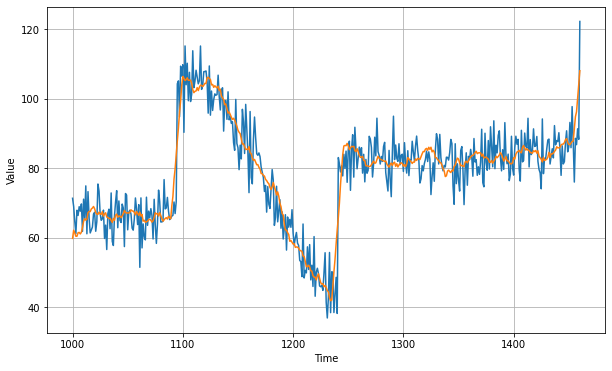

In [117]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [118]:
compute_metrics(x_valid, diff_moving_avg_plus_smooth_past) # better than all previous steps

34.315723
4.6053286


## Week 2 (Using Deep Neural Networks on TimeSeries)

**Preparing time series feaatures and Labels(via windowing)**

Where if prediction is in hourly measurements, you can take hours 1 to 11 and use to predict the value at the 12th hour

In [119]:
import tensorflow as tf

#Generate the tf dataset of 0 - 9
dataset = tf.data.Dataset.range(10)

# Window the data with stride of 1, but with a specific size. if size less than 5 drop
dataset = dataset.window(size = 5, shift = 1, drop_remainder=True)

for val in dataset:
  print([item.numpy() for item in val])  # if not done this way we won't get our needed dataset values, since dataset has been windowed

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [120]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(size = 5, shift = 1, drop_remainder=True)

# Flatten windows by putting elements in batch, allowing us to get values a once
# and batch this to be same length as window size
dataset = dataset.flat_map(lambda window: window.batch(5))

for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [121]:
# group into features and labels
dataset= tf.data.Dataset.range(10)
dataset = dataset.window(size = 5, shift = 1, drop_remainder = True)

dataset = dataset.flat_map(lambda window: window.batch(5))

# tuples where first 4 elements are features and last is label
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

dataset = dataset.shuffle(buffer_size = 10)   # shuffles the windows
dataset = dataset.batch(2).prefetch(1) # creates batches of windows

for x, y in dataset:
  # note each array in 2d array of X maps to one element in array of y
  print(f"x = {x.numpy()}")
  print(f"y = {y.numpy()}\n")

x = [[0 1 2 3]
 [4 5 6 7]]
y = [4 8]

x = [[5 6 7 8]
 [2 3 4 5]]
y = [9 6]

x = [[1 2 3 4]
 [3 4 5 6]]
y = [5 7]



**Single Layer NN**

In [122]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [123]:
# Utility functions to create dummy eries data

def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

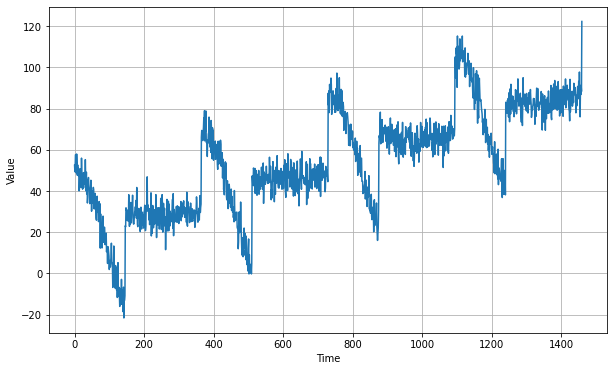

In [124]:
# gen the synthetic data
time = np.arange(4* 365 + 1, dtype ="float32")
baseline = 10
amplitude= 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [125]:
# split the dataset
split_time = 1000

# get the train set
time_train = time[:split_time]  # value to on x-axis
x_train = series[:split_time]   # actual series value we are interested in

# get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

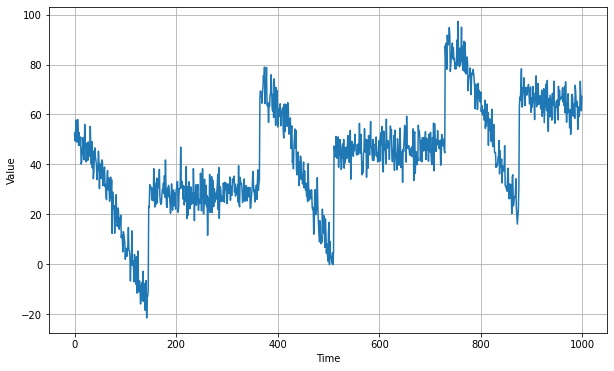

In [126]:
# plot train set
plot_series(time_train, x_train)

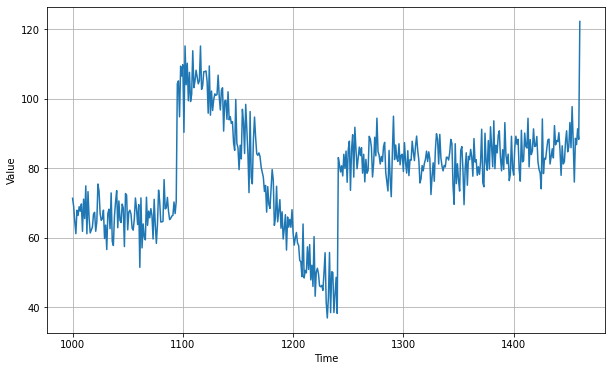

In [127]:
# plot validation set
plot_series(time_valid, x_valid)

In [128]:
# parameters for preparing features and labels
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000


#helper to get windowed dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

  # gen the tf dataset from the series data
  dataset = tf.data.Dataset.from_tensor_slices(series)

  # Window the data while also included an extra space to hold each feature along with window passed
  dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)

  # same goes to batch
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

  # create tuples with features and labels
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))

  # shuffle dataset and batch
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset



# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


# test that function to prepare features and labels is behaving as intended by printing a single batch 
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')  # should be 2
  print(f'shape of first element: {windows[0].shape}')       # should be batch_size and window size
  print(f'shape of second element: {windows[1].shape}')      # should be batch_size, this holds the y values in batch

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


In [129]:
# Build Model(Single layer network or also a linear reg model)

l0 = keras.layers.Dense(1, input_shape=[window_size])
model = keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

Layer weights: 
 [array([[-0.05656937],
       [ 0.12075406],
       [ 0.11557412],
       [-0.0548093 ],
       [-0.46901968],
       [-0.0313834 ],
       [-0.12231967],
       [-0.5242374 ],
       [-0.4097733 ],
       [-0.18759602],
       [-0.25746682],
       [-0.32980436],
       [ 0.27963692],
       [-0.16312549],
       [-0.16771027],
       [-0.47849777],
       [-0.47550955],
       [ 0.4375741 ],
       [ 0.10089511],
       [ 0.3308885 ]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [131]:
model.fit(dataset, epochs = 100, verbose = 0)

In [132]:
# Print the layer weights after training( first array list is for the W values and the other is for the b value)
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.05615828],
       [ 0.00545105],
       [ 0.06073851],
       [-0.00769722],
       [-0.03713173],
       [ 0.04656538],
       [ 0.01321443],
       [-0.03503264],
       [-0.03030465],
       [ 0.05474213],
       [-0.01876083],
       [-0.03762331],
       [ 0.03002688],
       [ 0.04895902],
       [ 0.02388673],
       [ 0.0055239 ],
       [-0.03161195],
       [ 0.24652596],
       [ 0.2619327 ],
       [ 0.4471676 ]], dtype=float32), array([0.01417582], dtype=float32)]


In [133]:
# Shape of the first 20 data points slice(which is our window size)
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way) to make data to be in batch_format
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
model prediction: [[44.38343]]


In [134]:
# predict over validation set

"""
implementation is slow, will improve this in next part
since we are forecasting over the whole series and after forecasting, we split the forecasts to get the ones for just the validatio set
"""

forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:] # - windo_size since forecast is less than series by -window_size, and we need forecast for val_data

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

length of the forecast list: 461
shape of the validation set: (461,)


shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


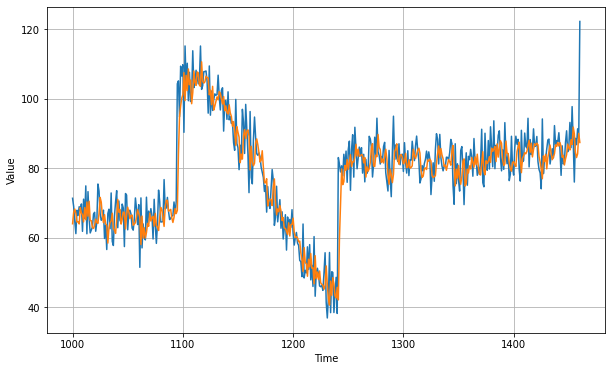

46.17313
4.9878893


In [135]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

**Deep Neural Networks**

In [136]:
model_baseline = keras.models.Sequential([
    keras.layers.Dense(10, input_shape = [window_size], activation ="relu"),
    keras.layers.Dense(10, activation ="relu"),
    keras.layers.Dense(1)
])

model_baseline.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

# Train the model
history = model_baseline.fit(dataset,epochs=100, verbose = 0)

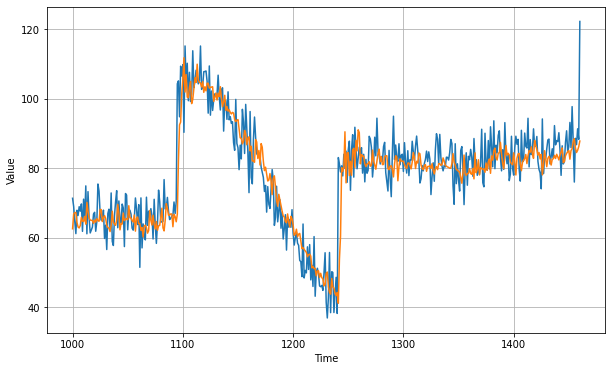

46.923935
4.9934225


In [138]:
# gets the series to forecast that alligns with the val data, making forecasting faster(right way to do things)

forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time : time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

**Tuning the Learning rate to get right value**

In [139]:
model_tune =  keras.models.Sequential([
    keras.layers.Dense(10, input_shape = [window_size], activation ="relu"),
    keras.layers.Dense(10, activation ="relu"),
    keras.layers.Dense(1)
])

# LR schdule, which will gradually increase LR as epochs increases
# Normally in training NN, we use this to reduce LR gradually, but used here to increase since we are trying to get best LR
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 ** (epoch/ 20)
)

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [140]:
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose = 0)

(1e-08, 0.001, 0.0, 300.0)

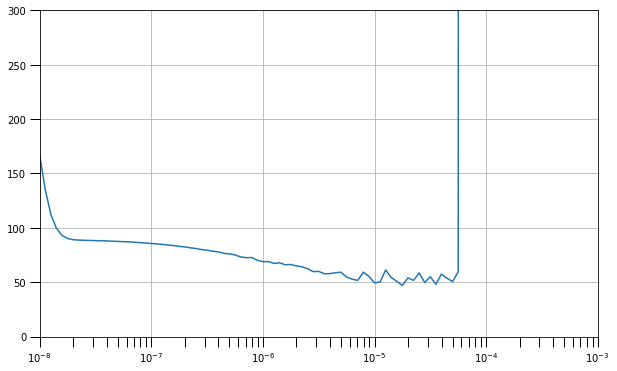

In [141]:
# plots result of tranining i.e loss at each value of learning_rate
lrs = 1e-8 * (10 ** (np.arange(100)/ 20))

plt.figure(figsize = (10, 6))
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

In [142]:
# build model after geting the right learning rate which in my case is lowest part of curve where curve is smooth
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=7e-6, momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

In [143]:
# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 3ms/step - loss: 478.2573
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 119.9233
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 91.0259
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 77.8591
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 67.7184
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 60.7295
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 54.3097
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 50.6997
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 49.5294
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 48.4307
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 48.8515
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 50.3402
Epoch 13/100
31/31 [===

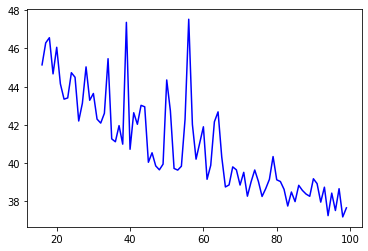

In [144]:
# plot loss
loss = history.history["loss"]


 # plots first 16 epochs loss rather than all to see if loss is actually reducing
epochs = range(16, len(loss))
plot_loss = loss[16:] 

plt.plot(epochs, plot_loss, "b", label="training loss");

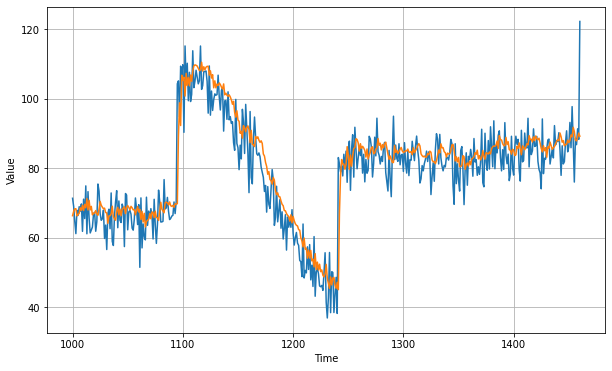

44.88023
5.129611


In [145]:
# use to make prediction and compare result of model build with random guess of learning rate
forecast = []

forecast_series = series[split_time - window_size:]

for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time: time + window_size][np.newaxis]))

results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())